# **Wholesale Customers Dataset - Cluster Analysis**


---

> **Author: Nikhilesh Kumar**

> **Email ID: nikhileshkumar97@gmail.com**

> **GitHub: https://github.com/naaikey**





---




---

# **Overview**

---
This project aimed to analyze a wholesale customer dataset to identify distinct customer segments based on their annual spending patterns across various product categories. The goal was to provide the distributor with actionable insights to optimize their delivery service and business strategies.



---


### **Analysis Approach:**

---

The analysis commences with data preprocessing, involving a natural logarithm transformation to normalize skewed spending distributions and the removal of outliers to ensure robust analysis. Principal Component Analysis (PCA) was then applied to reduce the dimensionality of the data, revealing underlying patterns in customer spending. Finally, Gaussian Mixture Model (GMM) clustering was employed, with a silhouette score indicating that **two distinct customer segments** provided the most optimal clustering structure.

---
### **Key Findings:**

---

Two primary customer segments were identified:

*   **Cluster 0: "Staple Goods Bulk Purchasers"**
    *   **Spending Profile:** Characterized by significantly higher annual spending on `Milk`, `Grocery`, and `Detergents_Paper`. Their spending on `Fresh` and `Frozen` products is comparatively lower. `Delicassen` spending is moderate.
    *   **Typical Channel & Region:** Predominantly composed of **Channel 2 (Horeca)** customers, with a strong presence in **Region 3 (Lisbon)** and **Region 1 (Oporto)**. This segment likely represents large establishments such as hotels, restaurants, or supermarkets.

*   **Cluster 1: "Fresh & Frozen Specialists"**
    *   **Spending Profile:** Distinguished by significantly higher spending on `Fresh` and `Frozen` products. Expenditure on `Milk`, `Grocery`, and `Detergents_Paper` is considerably lower.
    *   **Typical Channel & Region:** Primarily consists of **Channel 1 (Retail)** customers, also with high concentrations in **Region 3 (Lisbon)** and **Region 1 (Oporto)**. This segment likely includes specialized food stores or smaller retail outlets focusing on fresh produce and frozen items.

---
### **Main Implications:**

---

The identification of these distinct segments provides crucial insights for the wholesale distributor to move beyond a one-size-fits-all approach. Key recommendations include:

*   **Tailored Marketing & Sales:** Develop targeted campaigns that resonate with the specific needs of each segment (e.g., bulk discounts for Cluster 0, quality/freshness emphasis for Cluster 1).
*   **Optimized Product Offerings:** Align inventory and product assortments with the dominant spending patterns of each cluster.
*   **Differentiated Logistics:** Customize delivery schedules, vehicle types, and service levels (e.g., temperature-controlled for Cluster 1, larger deliveries for Cluster 0) to improve efficiency and customer satisfaction.
*   **Strategic Growth:** Focus on acquiring and serving businesses that align with the most profitable segments and adapt strategies for less profitable ones.

By leveraging these insights, the distributor can enhance operational efficiency, boost customer satisfaction, and drive profitability through more focused and effective business strategies.

---

In [1]:
import kagglehub
binovi_wholesale_customers_data_set_path = kagglehub.dataset_download('binovi/wholesale-customers-data-set')

print('Data source import complete.')


100%|██████████| 6.85k/6.85k [00:00<00:00, 12.2MB/s]

Extracting files...
Data source import complete.


# **Introduction**
---
In this project, we will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

---

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



> **Importing Libraries**



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



> **Reading the dataset**



In [4]:
import os

raw_data = pd.read_csv(os.path.join(binovi_wholesale_customers_data_set_path, 'Wholesale customers data.csv'))
raw_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
raw_data.shape

(440, 8)



> **Checking Missing Values**



In [6]:
raw_data.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [7]:
raw_data.dtypes

,0
Channel,int64
Region,int64
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64




> Excluding attributes 'Channel' and 'Region' from the DataFrame for the initial clustering analysis, focusing on the goal of segmenting based purely on spending patterns and the suitability of modeling used.



In [8]:
data = raw_data.iloc[:,2:]
# excluding 'channel' & 'region', considering dataset with only spending features for analysis
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185




## **Metadata Analysis**



---
In the context of the Wholesale Customers dataset, each row in the dataset represents a different customer, while each column  represents a different category of annual spending by that customer.

Here's a general breakdown of what each cell in the dataset represents:

Row: Each row corresponds to a specific customer, who is typically a retailer, hotel, restaurant, cafe, or another establishment purchasing from a wholesale distributor.

Column: Each column after the initial identifying columns typically represents a different category of products purchased by the customer.

Common categories include:


1.   Fresh: Annual spending (monetary value) on fresh products (e.g., fruits,
vegetables).
2.   Milk: Annual spending on milk products.
1.   Grocery: Annual spending on grocery products.
2.   Frozen: Annual spending on frozen products.
1.   Detergents_Paper: Annual spending on detergents and paper products.
2.   Delicassen: Annual spending on delicatessen products (e.g., meats, cheeses).

---












# **Exploratory Data Analysis**
---
In this section, we will begin exploring the data through visualizations and code to understand how each feature is related to the others. We will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

---

In [9]:
# Display a description of the dataset

data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# **Sample Selection**
---
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, we add three random indices  to the indices list which will represent the customers to track. It is suggested we  try different sets of samples until we obtain customers that vary significantly from one another.

---

In [10]:
# Select three indices of your choice you wish to sample from the dataset
indices = [56,135,429]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,4098,29892,26866,2616,17740,1340
1,6300,1289,2591,1170,199,326
2,8607,1750,3580,47,84,2501


# **Visualize Feature Distributions**
---       
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data.

---

array([[<Axes: xlabel='Fresh', ylabel='Fresh'>,
        <Axes: xlabel='Milk', ylabel='Fresh'>,
        <Axes: xlabel='Grocery', ylabel='Fresh'>,
        <Axes: xlabel='Frozen', ylabel='Fresh'>,
        <Axes: xlabel='Detergents_Paper', ylabel='Fresh'>,
        <Axes: xlabel='Delicassen', ylabel='Fresh'>],
       [<Axes: xlabel='Fresh', ylabel='Milk'>,
        <Axes: xlabel='Milk', ylabel='Milk'>,
        <Axes: xlabel='Grocery', ylabel='Milk'>,
        <Axes: xlabel='Frozen', ylabel='Milk'>,
        <Axes: xlabel='Detergents_Paper', ylabel='Milk'>,
        <Axes: xlabel='Delicassen', ylabel='Milk'>],
       [<Axes: xlabel='Fresh', ylabel='Grocery'>,
        <Axes: xlabel='Milk', ylabel='Grocery'>,
        <Axes: xlabel='Grocery', ylabel='Grocery'>,
        <Axes: xlabel='Frozen', ylabel='Grocery'>,
        <Axes: xlabel='Detergents_Paper', ylabel='Grocery'>,
        <Axes: xlabel='Delicassen', ylabel='Grocery'>],
       [<Axes: xlabel='Fresh', ylabel='Frozen'>,
        <Axes: xlabel='M

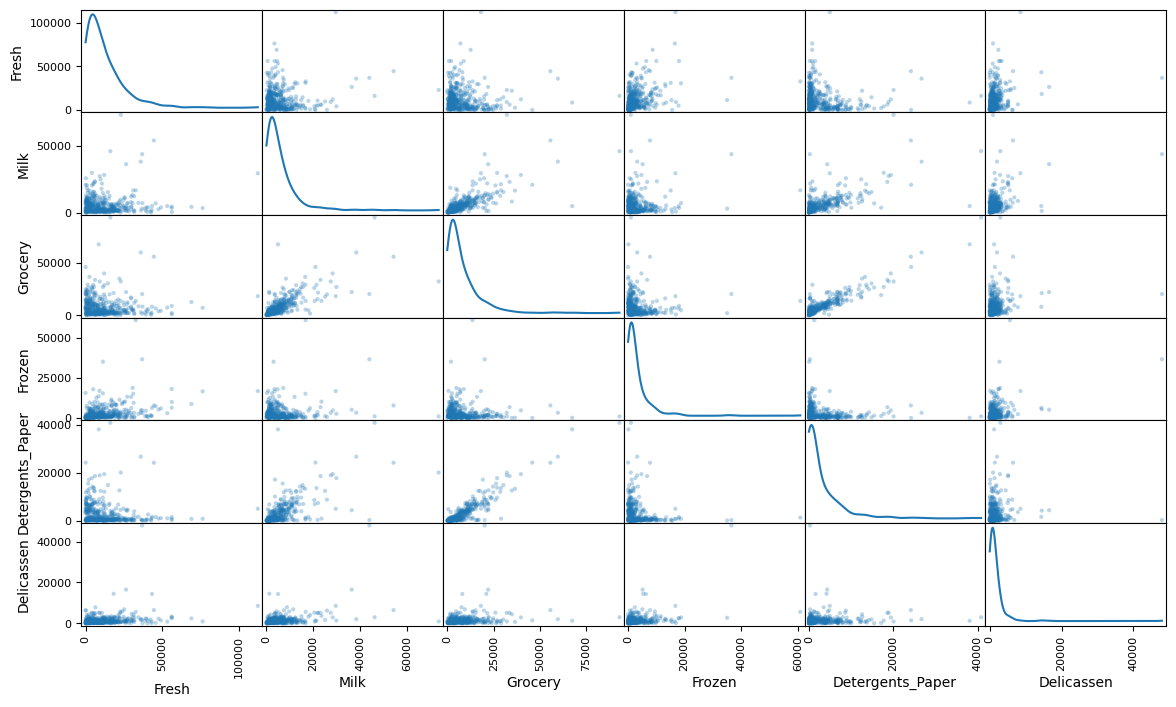

In [11]:
# Scatter Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.3, figsize=(14, 8), diagonal='kde')

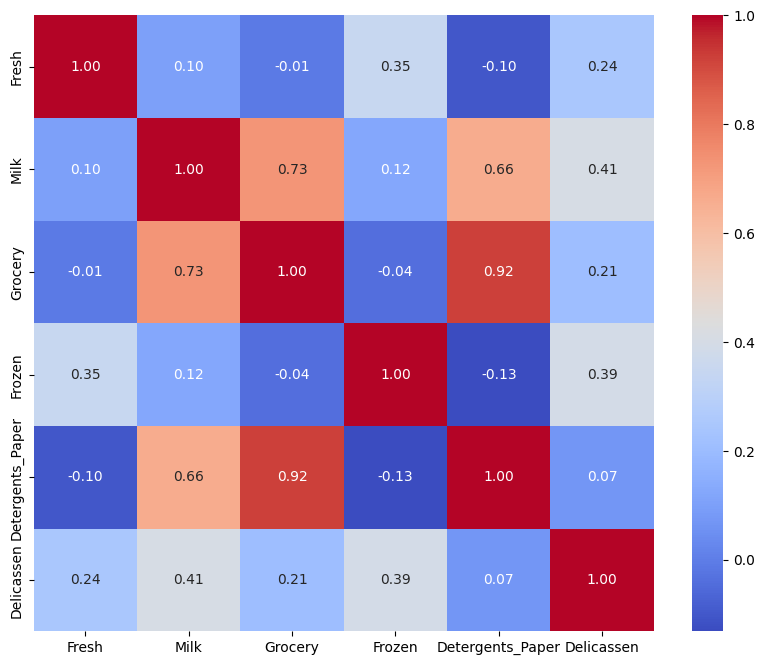

In [12]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

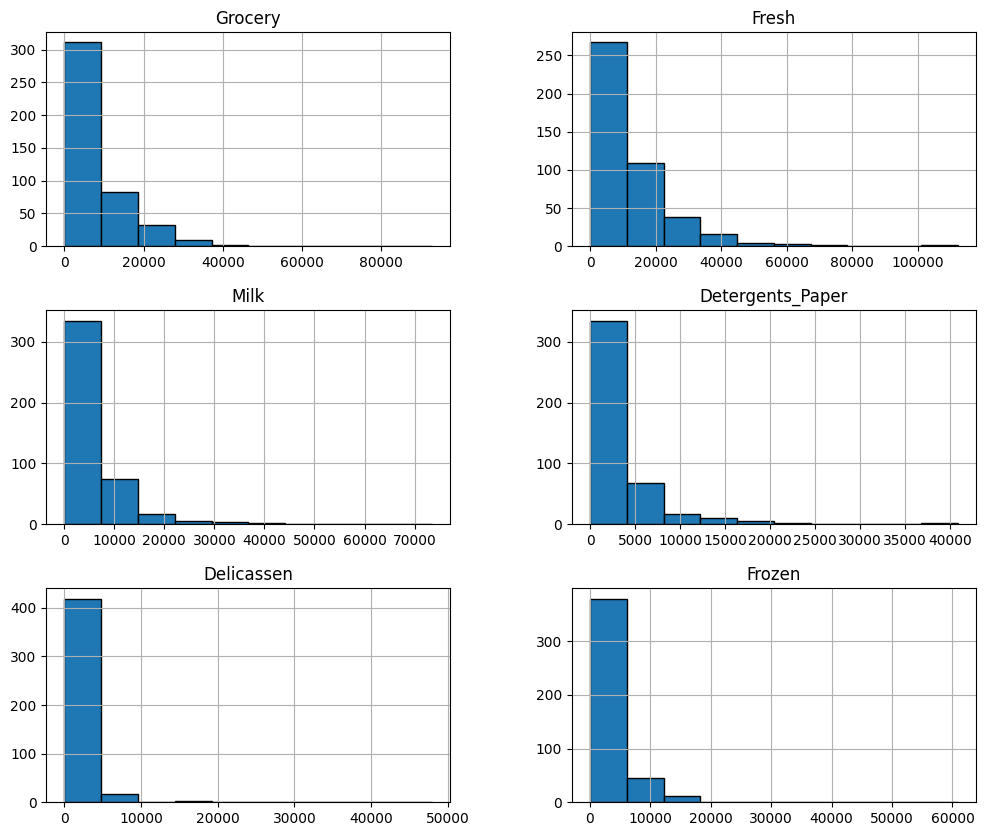

In [13]:
# Histograms for each specified column
data.hist(column=['Grocery', 'Fresh', 'Milk', 'Detergents_Paper','Delicassen',  'Frozen'], figsize=(12, 10), edgecolor = 'black')
plt.show()

In [14]:
skewness_data= data.skew()
print("Skewness values for each feature:\n")
print(skewness_data)

Skewness values for each feature:

Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64


# **Data Preprocessing**
---
In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical
step in assuring that results obtained from analysis are significant and meaningful.

---

## **Feature Scaling**

---
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

---

In [15]:
# Scale the data using the natural logarithm

log_data = np.log(data);
log_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


In [16]:
#Scale the sample data using the natural logarithm
log_samples = np.log(samples);
log_samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,8.318254,10.305346,10.198617,7.869402,9.783577,7.200425
1,8.748305,7.161622,7.859799,7.064759,5.293305,5.786897
2,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446


array([[<Axes: xlabel='Fresh', ylabel='Fresh'>,
        <Axes: xlabel='Milk', ylabel='Fresh'>,
        <Axes: xlabel='Grocery', ylabel='Fresh'>,
        <Axes: xlabel='Frozen', ylabel='Fresh'>,
        <Axes: xlabel='Detergents_Paper', ylabel='Fresh'>,
        <Axes: xlabel='Delicassen', ylabel='Fresh'>],
       [<Axes: xlabel='Fresh', ylabel='Milk'>,
        <Axes: xlabel='Milk', ylabel='Milk'>,
        <Axes: xlabel='Grocery', ylabel='Milk'>,
        <Axes: xlabel='Frozen', ylabel='Milk'>,
        <Axes: xlabel='Detergents_Paper', ylabel='Milk'>,
        <Axes: xlabel='Delicassen', ylabel='Milk'>],
       [<Axes: xlabel='Fresh', ylabel='Grocery'>,
        <Axes: xlabel='Milk', ylabel='Grocery'>,
        <Axes: xlabel='Grocery', ylabel='Grocery'>,
        <Axes: xlabel='Frozen', ylabel='Grocery'>,
        <Axes: xlabel='Detergents_Paper', ylabel='Grocery'>,
        <Axes: xlabel='Delicassen', ylabel='Grocery'>],
       [<Axes: xlabel='Fresh', ylabel='Frozen'>,
        <Axes: xlabel='M

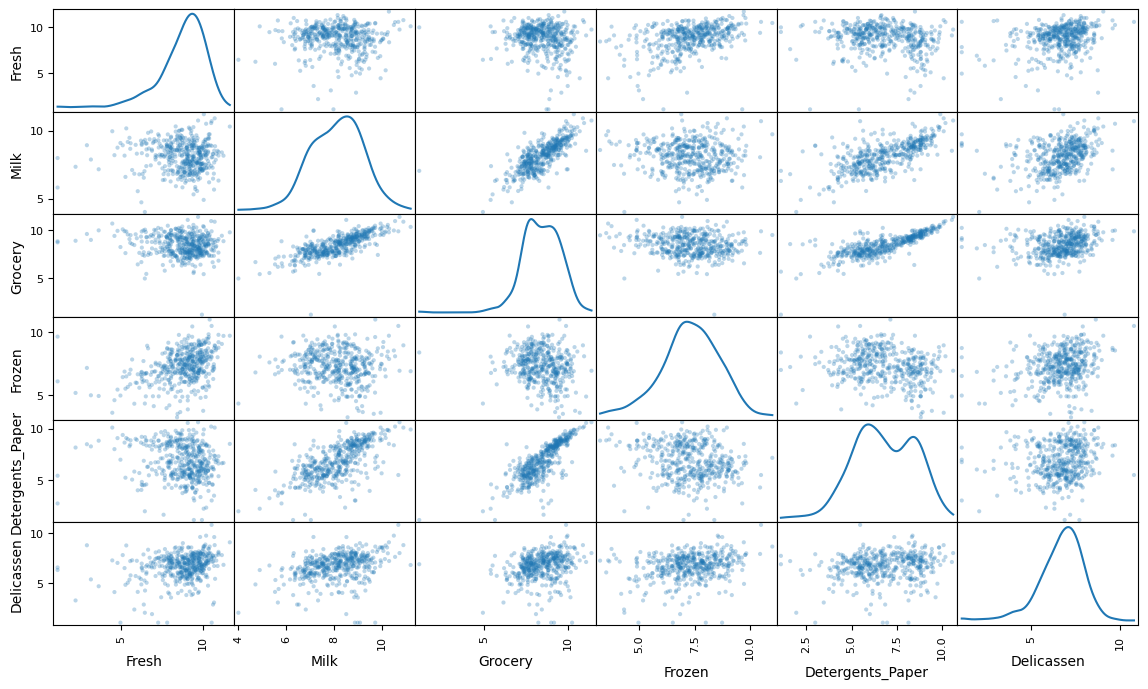

In [17]:
# Produce a scatter matrix for each pair of newly-transformed features
scatter_matrix(log_data, alpha=0.3, figsize=(14, 8), diagonal='kde')



> After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal.



# **Outlier Detection**
---
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The
presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use Tukey's Method for identfying outliers
An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.
In the code block below, you will  implement the following:
* Assign the value of the 25th percentile for the given feature to Q1. Use np.percentile for this.
* Assign the value of the 75th percentile for the given feature to Q3. Again, use np.percentile.
* Assign the calculation of an outlier step for the given feature to step.

Once you have performed this implementation, the dataset will be stored in the variable good_data.

---

In [18]:
# For each feature find the data points with extreme high or low values

for feature in log_data.keys():
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1);

    # Display the outliers
    print("\nData points considered outliers for the feature '{}':".format(feature))

    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])




Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382



Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275



Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442



Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244



Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101



Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [19]:
# Select the indices with highest mode for data points you wish to remove
outliers = [65, 66, 128, 154, 75]
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
# print index of data points considered outliers
print(outliers)
print(log_data.index[outliers])

[65, 66, 128, 154, 75]
Index([65, 66, 128, 154, 75], dtype='int64')


# **Feature Transformation**
---
In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best
maximize variance, we will find which compound combinations of features best describe customers.

---

## **Principal Component Analysis**
---
Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed,we can now apply PCA to the good_data to discover which dimensions about the data best maximize the
variance of features involved. In addition to finding these dimensions, PCA will also report the explained variance ratio of each dimension — how much variance within the data is explained by that dimension alone. Note that a
component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, we will need to implement the following:
* Import sklearn.decomposition.PCA and assign the results of fitting PCA in six dimensions with good_data to pca.
* Apply a PCA transformation of log_samples using pca.transform, and assign the results to pca_samples.

---

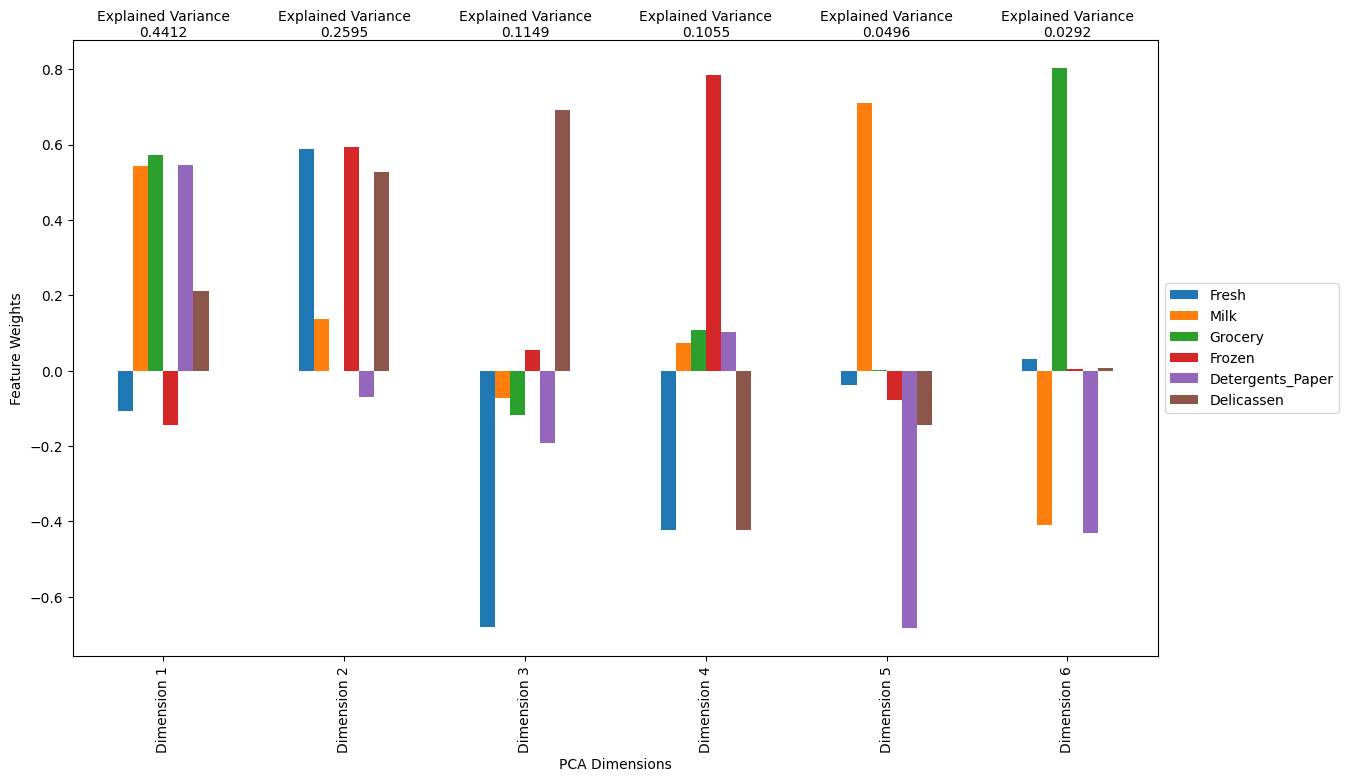

Explained variance (first component): 2.653277774225451
Explained variance (second component): 1.560856169527694
Explained variance ratio (first component): 0.4411963808482169
Explained variance ratio (second component): 0.2595446657375553


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'good_data' is loaded as a pandas DataFrame and preprocessed accordingly

# Standardize the data
scaler = StandardScaler()
good_data_scaled = scaler.fit_transform(good_data)

# Initialize and fit PCA
pca = PCA(n_components=6)
pca.fit(good_data_scaled)


# Create a DataFrame with the PCA components
components_df = pd.DataFrame(pca.components_, columns=good_data.columns, index=[f'Dimension {i}' for i in range(1, 7)])

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# We will use a bar plot, with the position of the bar depending on the dimension and the height based on the feature importance
components_df.plot(ax=ax, kind='bar').legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set the xlabel and ylabel
ax.set_xlabel("PCA Dimensions")
ax.set_ylabel("Feature Weights")
#ax.set_title("PCA Component Makeup by Feature")

# Display the explained variance on top of the bars
for i, var in enumerate(pca.explained_variance_ratio_):
    ax.text(i, ax.get_ylim()[1], f'Explained Variance\n{var:.4f}', ha='center', va='bottom')

plt.show()


# Print the first two components of explained variance and explained variance ratio
print("Explained variance (first component):", pca.explained_variance_[0])
print("Explained variance (second component):", pca.explained_variance_[1])
print("Explained variance ratio (first component):", pca.explained_variance_ratio_[0])
print("Explained variance ratio (second component):", pca.explained_variance_ratio_[1])


---
## Explained Variance
---
* Definition: Explained variance measures the proportion of the dataset’s total variance that each principal component captures. It's typically expressed as a percentage.
* Calculation: To find the explained variance of each principal component, you divide the eigenvalue associated with that component by the sum of all eigenvalues, then multiply by 100 to get a percentage.

---
## Eigenvalues

---
* Definition: Eigenvalues represent raw measures of variance along each principal component/dimension without context to the other components/dimensions.Eigenvalues are the values obtained from the eigendecomposition of the covariance matrix (or correlation matrix, if data was standardized) of your dataset. Each eigenvalue corresponds to a principal component.
* Significance: The magnitude of an eigenvalue indicates the amount of variance that is captured by its corresponding principal component. A larger eigenvalue implies that the principal component captures a larger amount of variance.

---




> The key takeaway is that the Explained Variance of each dimension/principle component (ie. how much variance in the data is capatred by a principal component) comes from dividing the raw eigenvalue of that PC by the sum of all the eigenvalues.



Eigen values : 
 [2.65327777 1.56085617 0.69108376 0.63431202 0.29854361 0.17575155]
Explained Variance : 
 [0.44119638 0.25954467 0.11491584 0.10547564 0.04964288 0.02922459]


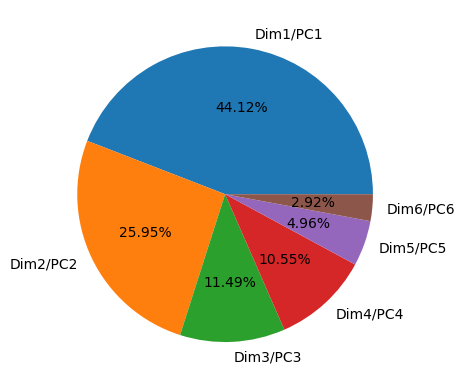

In [21]:
# Another graph that captures the explained variance: A pie chart
pca2 = PCA(n_components=6)
pca2.fit(good_data_scaled)
eigen_values = pca2.explained_variance_
explained_variance_ratio= pca2.explained_variance_ratio_

plt.pie(x =eigen_values,labels=["Dim1/PC1","Dim2/PC2","Dim3/PC3","Dim4/PC4","Dim5/PC5","Dim6/PC6"],autopct="%.2f%%")

print("Eigen values : \n",eigen_values)
print("Explained Variance : \n",explained_variance_ratio)


## **Dimensionality Reduction**
---
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in
effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions
used implies less of the total variance in the data is being explained. Because of this, the cumulative explained
variance ratio is extremely important for knowing how many dimensions are necessary for the problem.
Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can
be visualized afterwards.

In the code block below, we implement the following:
* Assign the results of fitting PCA in two dimensions with good_data to pca.
* Apply a PCA transformation of good_data using pca.transform, and assign the results to reduced_data.
* Apply a PCA transformation of log_samples using pca.transform, and assign the results to pca_samples.

---

In [22]:
# Apply PCA by fitting the good data with only two dimensions
# (Earlier we had built a PCA model using all 6 dimensions/principal components. Now we
# perform dimensionality reductions by building a PCA model using only 2 dimensions and not 6)

pca = PCA(n_components=2)
pca = pca.fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples);

# Create a DataFrame for the reduced data
reduced_data_df = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# View the resudced data
reduced_data_df

,Dimension 1,Dimension 2
0,1.757983,-0.009711
1,1.788665,0.812251
2,1.883353,1.599135
3,-1.155265,1.405201
4,0.784786,2.394294
...,...,...
430,-0.644850,2.858285
431,-3.184831,1.944772
432,3.742535,0.856146
433,-1.669147,0.397968


# **Visualising a Biplot**
---
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case Dimension 1 and Dimension 2). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

---


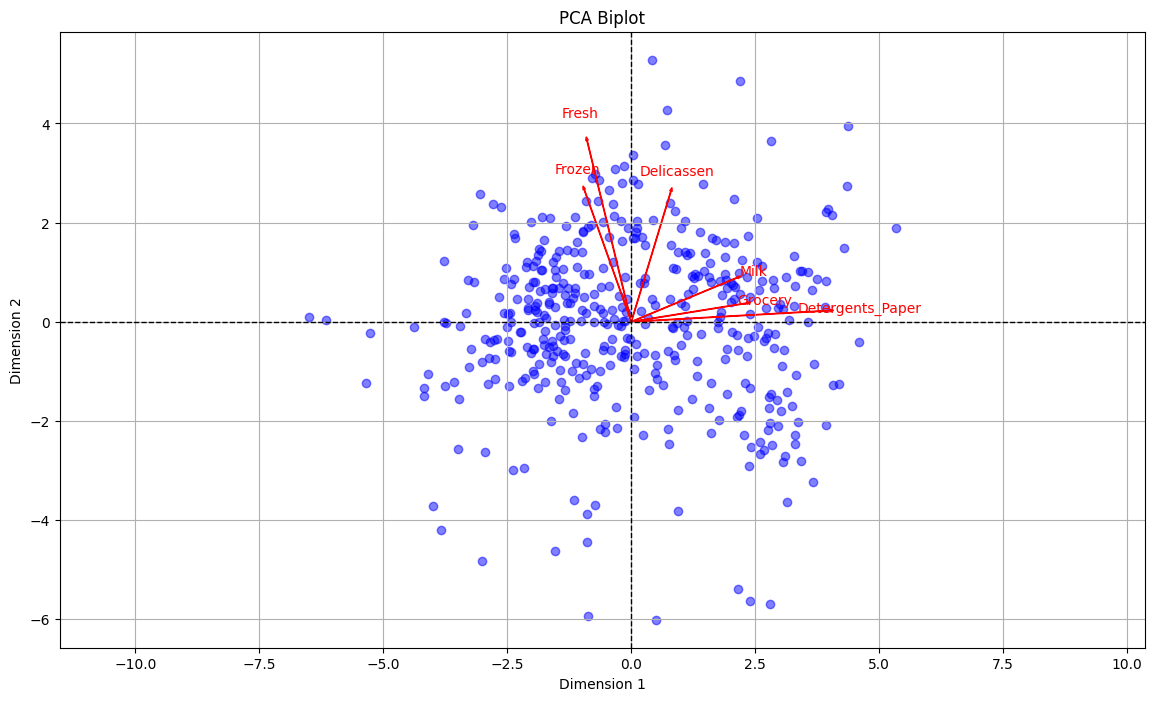

In [23]:

#Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

#Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

#Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

#Create a DataFrame for the reduced data
reduced_data_df = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])

# Plot the reduced data
plt.figure(figsize=(14,8))
plt.scatter(reduced_data_df['Dimension 1'], reduced_data_df['Dimension 2'], alpha=0.5, color='blue')

# Overlay the vectors for each original feature
for i, col in enumerate(good_data.columns):
    # Use pca.components_ to get the direction of the feature in the new feature space
    vec = pca.components_[:, i] * max(reduced_data_df.max())  # Scale the vectors for better visibility
    # Plot the feature vector, anchored at the mean of the reduced data
    plt.arrow(0, 0, vec[0], vec[1], color='red', width=0.01, head_width=0.05)
    plt.text(vec[0] * 1.15, vec[1] * 1.15, col, color='red', ha='center', va='center')

# Add grid, labels and title to the plot
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('PCA Biplot')
plt.grid(True)
plt.axis('equal')  # Setting equal scaling to maintain the orthogonal nature of principal components

# Show the plot
plt.show()

# **Understanding Biplot Visualisation**

---
The biplot is a powerful visualization that helps us understand the relationship between the reduced dimensions, the original features, and the data points themselves. Let's break down the results:

**Blue Data Points:** Each blue dot represents a customer from your good_data dataset, projected onto the two principal components (Dimension 1 and Dimension 2). Customers that are close together in this plot have similar spending patterns across the product categories.

**Red Arrows (Feature Vectors):** These arrows represent the original six features (Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen).

**Direction:** The direction of an arrow indicates how that original feature contributes to the two principal components. Features pointing in the same direction are positively correlated, while those pointing in opposite directions are negatively correlated. For example, 'Milk', 'Grocery', and 'Detergents_Paper' all point somewhat in the same general direction (top-left to bottom-right quadrant), suggesting they are positively correlated with each other and contribute similarly to the underlying dimensions.

**Length:** The length of an arrow indicates the strength of the feature's influence on the dimensions. Longer arrows mean the feature explains more variance along that direction. 'Fresh' and 'Frozen' appear to have significant influence, particularly along Dimension 1 and Dimension 2 respectively, or a combination of both.
Interpretation of Dimensions:

**Dimension 1 (Horizontal Axis):** Features like 'Milk', 'Grocery', and 'Detergents_Paper' have strong positive components along Dimension 1. This suggests that Dimension 1 might represent a general spending pattern on essential/staple goods (e.g., restaurants, cafes, larger families). Customers on the right side of this dimension likely spend more on these categories, while those on the left spend less.

**Dimension 2 (Vertical Axis):** Features like 'Fresh' and 'Frozen' contribute strongly to Dimension 2. This dimension could differentiate customers who prioritize perishable goods and frozen items (e.g., catering businesses, specialized food stores). Customers higher on this dimension would spend more on these, and lower on this dimension would spend less.

---

**Overall Insight:** The biplot helps us see potential customer segments. For instance, customers in the upper-right quadrant might be heavy spenders on milk, groceries, detergents, fresh, and frozen items. Those in the lower-left might spend less across most categories, or more on categories represented by vectors pointing in that direction. This visualization clearly shows that 'Milk', 'Grocery', and 'Detergents_Paper' are highly correlated, which is also supported by the correlation heatmap generated earlier.

---

# **Clustering**

---
## **K-means Clustering**
---
**K-means clustering** is a type of unsupervised learning algorithm that groups data into a predefined number of clusters (k). Here’s how it works:
1. **Initialization**: Start by randomly selecting k points as cluster centers.
2. **Assignment**: Assign each data point to the nearest cluster center based on distance (typically Euclidean distance).
3. **Update**: Recalculate the cluster centers by taking the mean of all data points assigned to each cluster.
4. **Iteration**: Repeat the assignment and update steps until the cluster centers no longer change significantly or a set number of iterations is reached.

**Characteristics**:
- Simple and efficient, especially for large datasets.
- Assumes clusters are spherical and evenly sized, which might not always be the case.
- Results in hard clustering (each data point belongs to one cluster).

---
## **Gaussian Mixture Models (GMM)**

---
**Gaussian Mixture Models** are a probabilistic model for representing normally distributed subpopulations within an overall population. The process is as follows:
1. **Assumption**: Each cluster follows a Gaussian distribution.
2. **Initialization**: Parameters (mean, variance) of Gaussian distributions are initialized randomly.
3. **Expectation-Maximization (EM)**:
   - **Expectation (E-step)**: Estimate the likelihood of each data point belonging to each cluster.
   - **Maximization (M-step)**: Update the parameters to maximize the likelihood of the data given the clusters.
4. **Convergence**: Repeat E and M steps until the parameters stabilize.

**Characteristics**:
- Provides soft clustering (gives probabilities of belonging to clusters).
- Flexible in terms of cluster covariance and capable of identifying elongated or overlapping clusters.
- Computationally more intensive than K-means.

---
## **Hard Clustering**

---
**Hard Clustering** refers to a type of clustering in which each data point definitively belongs to one cluster. Examples include K-means where every point is assigned to exactly one cluster.

**Characteristics**:
- Simple to understand and implement.
- Often computationally less demanding.
- Can be limiting because it forces each point into a single cluster, which might not reflect the true structure.

---
## **Soft Clustering**
---
**Soft Clustering** allows for more flexibility by assigning a probability or degree of belonging to each cluster for every data point, rather than forcing a definitive assignment. This method is used in GMM.

**Characteristics**:
- Provides a richer representation of data uncertainties.
- Useful in scenarios where data points genuinely share characteristics with multiple clusters.
- Generally requires more complex algorithms and more computation.

---
These notes encapsulate the fundamental differences and procedures associated with each clustering technique and the concepts of hard and soft clustering in the context of unsupervised learning.

---

## **Creating Clusters**
---
Depending on the problem, the number of clusters that you expect to be in the data may already be known.
When the number of clusters is not known a priori, there is no guarantee that a given number of clusters best
segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the
"goodness" of a clustering by calculating each data point's silhouette coefficient. The silhouette coefficient for a data point measures
how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the mean silhouette
coefficient provides for a simple scoring method of a given clustering.

In the code block below, we implement the following:
* Fit a clustering algorithm to the reduced_data and assign it to clusterer.
* Predict the cluster for each data point in reduced_data using clusterer.predict and assign them to preds.
* Find the cluster centers using the algorithm's respective attribute and assign them to centers.
* Predict the cluster for each sample data point in pca_samples and assign them sample_preds.
* Import sklearn.metrics.silhouette_score and calculate the silhouette score of reduced_data
against preds.
* Assign the silhouette score to score and print the result.

---

In [24]:
# Apply clustering algorithm of choice to the reduced data

# Import library's to be used
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture as GMM

# Create range of clusters to loop through
range_of_clusters = list(range(2,8))

# Print number of clusters and range_of_clusters
#print "Total number of run: {}".format(no_of_cluster-1)
print("the list of clusters that will be generated are: {}".format(range_of_clusters))

# Create empty list to contain silhouette_scores
list_of_silhouette_scores =[];

# loop through clusters
for no_of_cluster in range_of_clusters:
# Apply your clustering algorithm of choice to the reduced data
    clusterer = GMM(n_components=no_of_cluster).fit(reduced_data);
# Predict the cluster for each data point
    preds = clusterer.predict(reduced_data);
# Find the cluster centers
    centers = clusterer.means_;
# Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
# Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
# Create list of silhouette_scores
    list_of_silhouette_scores.append(score)
# Print results
    print("For no_of_cluster = {}. The average silhouette_score is : {}".format(no_of_cluster, score))

# print "The center of for this number of clusters is: {}".format(centers)
print("The list of silhouette_scores are: {} after {} runs ".format(list_of_silhouette_scores,no_of_cluster-1))

print("The best score is: {}".format(max(list_of_silhouette_scores)))

the list of clusters that will be generated are: [2, 3, 4, 5, 6, 7]
For no_of_cluster = 2. The average silhouette_score is : 0.42191684646261507
For no_of_cluster = 3. The average silhouette_score is : 0.37307778235070144
For no_of_cluster = 4. The average silhouette_score is : 0.29702076731281235
For no_of_cluster = 5. The average silhouette_score is : 0.26283438554688915
For no_of_cluster = 6. The average silhouette_score is : 0.33556544486012163
For no_of_cluster = 7. The average silhouette_score is : 0.2403911154511339
The list of silhouette_scores are: [np.float64(0.42191684646261507), np.float64(0.37307778235070144), np.float64(0.29702076731281235), np.float64(0.26283438554688915), np.float64(0.33556544486012163), np.float64(0.2403911154511339)] after 6 runs 
The best score is: 0.42191684646261507




> The best score is given as the highest score, which is approx. 0.42 when the number of clusters = 2



---
**Optimal Number of Clusters:** The higher the silhouette score, the better the clustering configuration. In this case, 2 clusters yielded the highest silhouette score of 0.4219. This suggests that, based on this metric, segmenting the data into two distinct groups provides the most well-defined and separated clusters. This is valuable information for choosing the best n_components for your Gaussian Mixture model.

---

# **Cluster Visualisation**
---
Once we've chosen the optimal number of clusters for the clustering algorithm using the scoring metric above, we can now visualise the results by executing the code block below.

Note that, for experimentation purposes,
we can adjust the number of clusters for the clustering algorithm to see various visualisations. The final visualisation provided should, however, correspond with the optimal number of clusters.

---

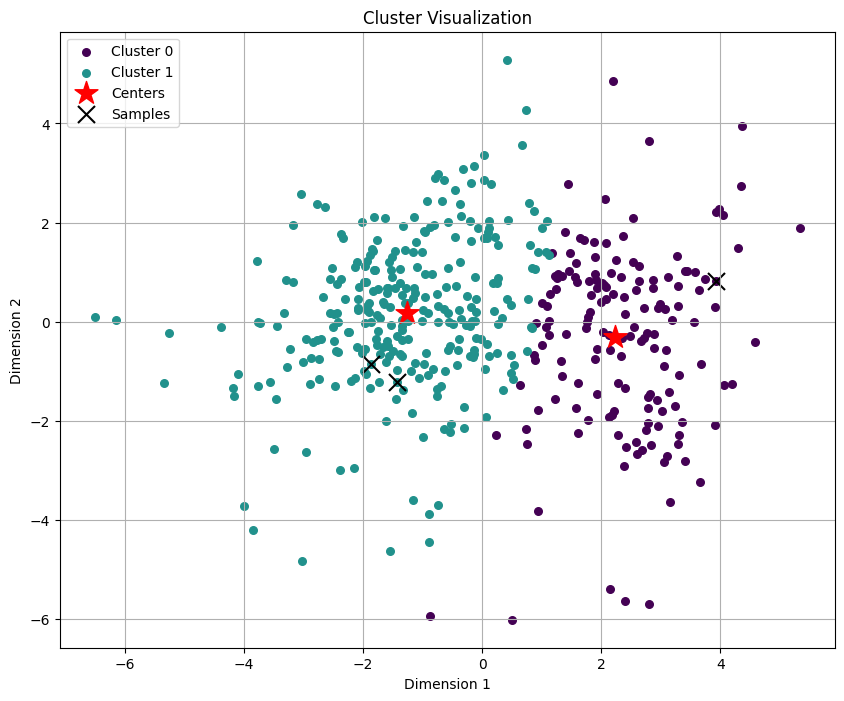

In [25]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# Assuming that reduced_data and pca_samples are defined
# reduced_data = ...
# pca_samples = ...

# Enter optimal cluster count
no_of_cluster = 2

# Apply Gaussian Mixture Model clustering to the reduced data
clusterer = GaussianMixture(n_components=no_of_cluster, random_state=42)
clusterer.fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.means_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Visualization function using matplotlib
def plot_clusters(data, predictions, cluster_centers, samples):
    # Create a new figure
    plt.figure(figsize=(10, 8))

    # Color map
    cmap = plt.get_cmap('viridis')

    # Plot each cluster
    for i in range(cluster_centers.shape[0]):
        # Select data points and samples in the cluster
        pts_in_cluster = data[predictions == i]
        plt.scatter(pts_in_cluster[:, 0], pts_in_cluster[:, 1], s=30, c=cmap(i / cluster_centers.shape[0]), label=f'Cluster {i}')

    # Plot cluster centers
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, marker='*', c='red', label='Centers')

    # Plot transformed sample data points
    plt.scatter(samples[:, 0], samples[:, 1], s=150, marker='x', c='black', label='Samples')

    # Decoration
    plt.title('Cluster Visualization')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot clusters
plot_clusters(np.array(reduced_data), preds, centers, np.array(pca_samples))


---

> Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the averages of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to the average customer of that
segment.






> Since, the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

---




# **Inverse Transform Cluster Centers**
---
Inverse transform the cluster centers from the reduced PCA space back to the original log-transformed feature space, and then inverse transform from the log-transformed space to the original spending units. This will give us the representative spending profiles for each customer segment.

---





> First, we will inverse transform the cluster centers from the 2-dimensional PCA space back to the 6-dimensional log-transformed feature space. Then, we will apply the exponential function to get the centers in original spending units and display them in a DataFrame.





In [26]:
import numpy as np
import pandas as pd

# Inverse transform the centers from PCA space back to log-transformed feature space
# The 'pca' object is already defined and fitted with 2 components in previous cells.
# The 'centers' variable contains the cluster centers in the reduced PCA space.
inverse_transformed_log_centers = pca.inverse_transform(centers);

# Apply exponential function to convert log-transformed values back to original spending units
original_scale_centers = np.exp(inverse_transformed_log_centers);

# Create a DataFrame for better readability
# The column names should be the original feature names from 'data' or 'good_data'
cluster_centers_df = pd.DataFrame(original_scale_centers, columns=data.columns);
cluster_centers_df.index = [f'Cluster {i}' for i in range(len(cluster_centers_df))];

print("Cluster Centers in Original Spending Units:")
display(cluster_centers_df)

Cluster Centers in Original Spending Units:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster 0,3566.567547,7859.951581,12249.092172,872.507556,4713.414367,966.154716
Cluster 1,8939.463669,2108.028147,2757.961146,2073.350234,351.548651,730.193989


## **Analysis of Customer Segments**



---
Based on the `cluster_centers_df` showing the average spending for each product category in original units for the two identified clusters, we can characterize the customer segments as follows:

---
**Cluster 0:**

*   **High Spending on Groceries, Milk, and Detergents_Paper:** This cluster shows significantly higher spending in these categories compared to Cluster 1. This suggests that customers in Cluster 0 are likely establishments that require a steady supply of staple goods, such as larger restaurants, cafes, or retail grocery stores.
*   **Lower Spending on Fresh and Frozen:** While still purchasing these items, their average spending on Fresh and Frozen products is considerably lower than on groceries, milk, and detergents/paper.
*   **Moderate Delicassen Spending:** Delicassen spending is moderate.

    **Potential Interpretation:** This segment likely represents businesses that heavily rely on general grocery items, dairy products, and cleaning supplies. They might be general retailers or food service businesses where prepared foods (delicassen) are not a primary focus, or fresh/frozen goods are sourced elsewhere.

---
**Cluster 1:**

*   **High Spending on Fresh and Frozen:** Customers in this cluster exhibit much higher average spending on Fresh and Frozen products, indicating a focus on perishable and preserved goods.
*   **Lower Spending on Milk, Groceries, and Detergents_Paper:** Their spending in these categories is considerably lower than Cluster 0.
*   **Lower Delicassen Spending:** Delicassen spending is also lower than Cluster 0.

    **Potential Interpretation:** This segment could represent businesses that specialize in fresh produce, meat, and frozen goods, such as specialized food stores, smaller restaurants with a focus on fresh ingredients, or catering services. They seem to have a less intensive need for general groceries or cleaning supplies.

---
**Key Differentiators:**

The most prominent difference between the two clusters is their spending patterns on **Fresh/Frozen goods vs. Milk/Grocery/Detergents_Paper**. Cluster 0 is characterized by high demand for general, everyday consumables, while Cluster 1 specializes in fresh and frozen products. This distinction is crucial for a wholesale distributor to tailor their services, inventory management, and marketing strategies.

---




> To visualize the representative customer profiles, we will create a bar chart comparing the spending profiles (cluster centers) for each segment. This will allow for a clear visual comparison of their spending habits across different product categories.





<Figure size 1200x700 with 0 Axes>

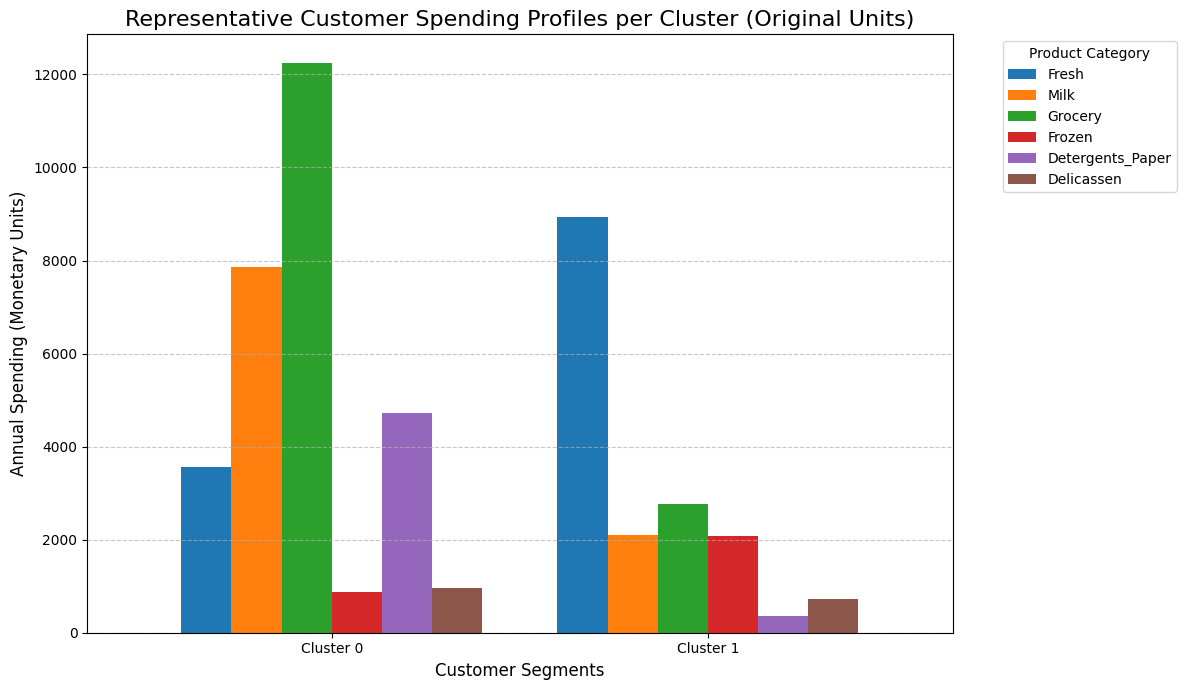

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 7))

# Create a bar plot for each cluster
cluster_centers_df.plot(kind='bar', figsize=(12, 7), width=0.8)

# Set labels and title
plt.title('Representative Customer Spending Profiles per Cluster (Original Units)', fontsize=16)
plt.xlabel('Customer Segments', fontsize=12)
plt.ylabel('Annual Spending (Monetary Units)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **Comprehensive Summary: Identified Customer Segments**



---
Based on the analysis and clustering of customer spending data, two distinct customer segments have been identified. Their characteristics and potential implications for the wholesale distributor are as follows:

---
### Cluster 0: "Staple Goods Bulk Purchasers"

*   **Distinguishing Features:** Customers in Cluster 0 demonstrate significantly higher annual spending on **Milk**, **Grocery**, and especially **Detergents_Paper**. Their spending on **Fresh** and **Frozen** products is comparatively lower. Their spending on **Delicassen** is moderate.
*   **Potential Interpretation:** This segment likely represents larger establishments such as supermarkets, hypermarkets, large restaurants, hotels, or institutional food services (e.g., schools, hospitals). These businesses have a high demand for everyday consumables, cleaning supplies, and general food items in bulk. They are less focused on fresh, specialized, or frozen goods, potentially sourcing them from other suppliers or having less need for them.
*   **Implications for Wholesale Distributor:**
    *   **Product Offering:** Focus on competitive pricing and bulk discounts for milk, groceries, and detergents/paper. Ensure a consistent supply of these high-demand items.
    *   **Marketing Strategy:** Tailor promotions around staple goods and operational supplies. Highlight efficiency, reliability, and cost-effectiveness for bulk purchases.
    *   **Logistics:** These customers may require larger delivery vehicles and more frequent, scheduled deliveries due to their high volume and steady demand for essential items.
    *   **Sales Approach:** Build long-term relationships with procurement managers, emphasizing supply chain stability and potential for volume-based contracts.

---
### Cluster 1: "Fresh & Frozen Specialists"

*   **Distinguishing Features:** Customers in Cluster 1 are characterized by significantly higher spending on **Fresh** and **Frozen** products. Their expenditure on **Milk**, **Grocery**, and **Detergents_Paper** is considerably lower than Cluster 0, as is their spending on **Delicassen**.
*   **Potential Interpretation:** This segment likely comprises businesses that prioritize perishable and frozen goods, such as specialized food stores (e.g., butchers, greengrocers), gourmet restaurants, smaller cafes with fresh menus, or catering businesses that emphasize high-quality ingredients. They have less need for bulk staple items or general cleaning supplies from the wholesale distributor.
*   **Implications for Wholesale Distributor:**
    *   **Product Offering:** Emphasize the quality, variety, and freshness of fresh produce, meats, seafood, and a wide range of frozen goods. Potentially offer niche or gourmet options.
    *   **Marketing Strategy:** Highlight product quality, origin, and specialized selections. Focus on prompt delivery and temperature-controlled logistics for sensitive items.
    *   **Logistics:** These customers may require more frequent, smaller, and potentially temperature-controlled deliveries. Flexibility in delivery schedules might be valued.
    *   **Sales Approach:** Engage with chefs, owners, and specialized buyers who are highly concerned with product quality and sourcing. Provide detailed product information and potentially samples.

---
### Overall Strategy for the Wholesale Distributor:

Understanding these two distinct segments allows the wholesale distributor to move away from a one-size-fits-all approach. By segmenting their customer base:

1.  **Optimized Inventory Management:** Better forecast demand for different product categories, reducing waste and improving stock rotation.
2.  **Tailored Marketing and Sales:** Develop targeted campaigns and sales pitches that resonate with the specific needs and priorities of each customer type.
3.  **Improved Service Delivery:** Customize delivery schedules, vehicle types, and even sales representative expertise to better serve each segment, leading to higher customer satisfaction and loyalty.
4.  **Strategic Product Development:** Identify gaps or opportunities to expand product lines that cater specifically to the dominant needs of each cluster.

By leveraging these insights, the wholesale distributor can enhance operational efficiency, increase customer satisfaction, and drive profitability through more focused and effective business strategies.

---

# **Map Cluster Labels to Original Data**

Map the identified cluster labels to the original data, including 'Channel' and 'Region' information, for the non-outlier data points. This will involve re-associating the cluster predictions with the corresponding rows from the original dataset.


In [28]:
import pandas as pd

# 1. Identify the original indices of the data points that were retained in `good_data`
# The 'good_data' DataFrame was created by dropping rows from 'log_data' using the 'outliers' list.
# To get the original indices, we can get the index of 'log_data' and drop the 'outliers' indices.
original_non_outlier_indices = log_data.index.drop(outliers)

# 2. Create a new DataFrame with 'Channel' and 'Region' for non-outlier data points
# Use .loc to ensure alignment with original_non_outlier_indices
clustered_data = raw_data.loc[original_non_outlier_indices, ['Channel', 'Region']].copy()

# 3. Add a new column named 'Cluster' with the cluster predictions (`preds`)
# Ensure 'preds' aligns with the rows in 'clustered_data'.
# 'preds' was generated from 'reduced_data', which corresponds to 'good_data', which aligns with original_non_outlier_indices.
clustered_data['Cluster'] = preds

# Reset the index of the new DataFrame
clustered_data.reset_index(drop=True, inplace=True)

print("Cluster labels successfully mapped to original data (Channel and Region) for non-outlier points.")
display(clustered_data.head())

print("Cluster counts:")
display(clustered_data['Cluster'].value_counts())


Cluster labels successfully mapped to original data (Channel and Region) for non-outlier points.


,Channel,Region,Cluster
0,2,3,0
1,2,3,0
2,2,3,0
3,1,3,1
4,2,3,1


Cluster counts:


,count
Cluster,
1,280
0,155


## **Analysis: Channel and Region Distribution per Cluster**






---
To understand the distribution of 'Channel' within each cluster, we will group the `clustered_data` DataFrame by 'Cluster' and 'Channel' and then count the occurrences of each combination. Unstacking 'Channel' will make the output more readable.

---





In [29]:
channel_distribution_per_cluster = clustered_data.groupby(['Cluster', 'Channel']).size().unstack(fill_value=0)

print("Distribution of 'Channel' within each Cluster:")
display(channel_distribution_per_cluster)

Distribution of 'Channel' within each Cluster:


Channel,1,2
Cluster,,
0,28,127
1,266,14



---

To understand the distribution of 'Region' within each cluster, we will group the `clustered_data` DataFrame by 'Cluster' and 'Region' and then count the occurrences of each combination. Unstacking 'Region' will make the output more readable.

---





In [30]:
region_distribution_per_cluster = clustered_data.groupby(['Cluster', 'Region']).size().unstack(fill_value=0)

print("Distribution of 'Region' within each Cluster:")
display(region_distribution_per_cluster)

Distribution of 'Region' within each Cluster:


Region,1,2,3
Cluster,,,
0,22,17,116
1,55,30,195


---

To visualize the distribution of 'Channel' within each cluster, we create a bar plot for `channel_distribution_per_cluster` which shows the counts of each channel for each cluster. This will provide a clear visual comparison.

---



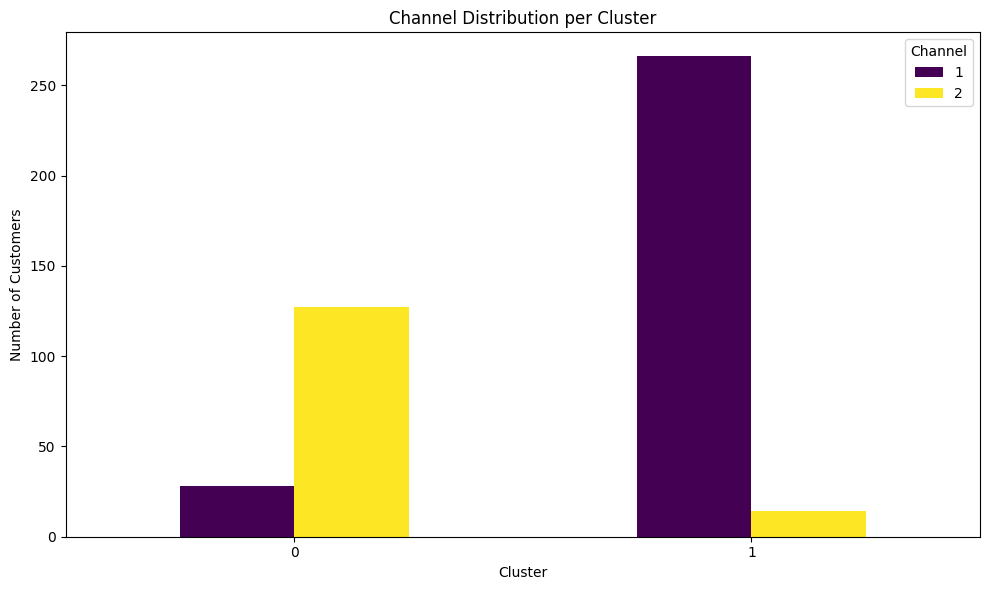

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the Channel distribution per cluster
channel_distribution_per_cluster.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Channel Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Channel')
plt.tight_layout()
plt.show()



---
To visualize the distribution of 'Region' within each cluster, I will create a bar plot for `region_distribution_per_cluster` which shows the counts of each region for each cluster. This will provide a clear visual comparison.

---





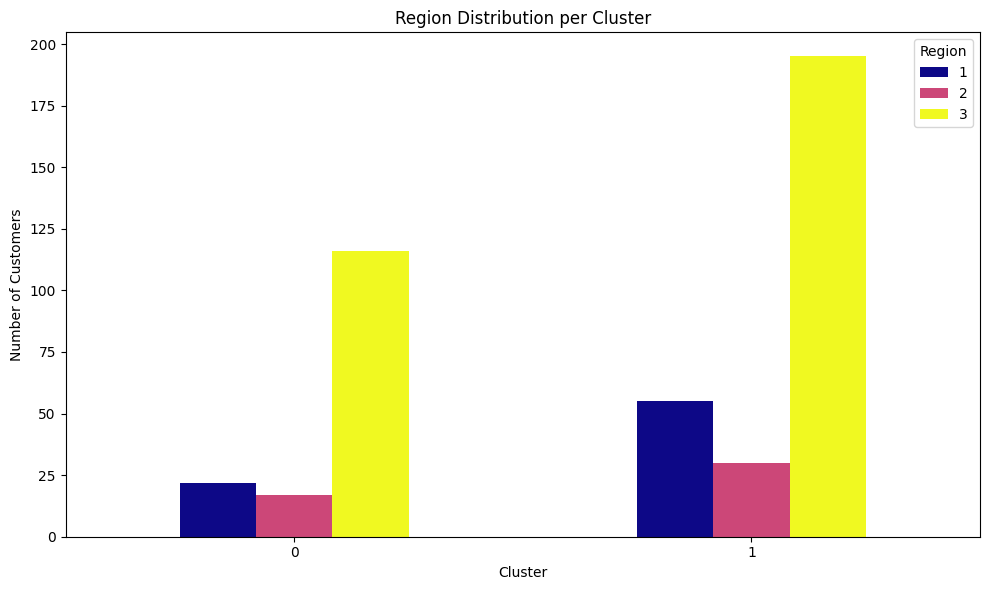

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the Region distribution per cluster
region_distribution_per_cluster.plot(kind='bar', figsize=(10, 6), colormap='plasma')
plt.title('Region Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

## **Comprehensive Summary: Channel and Region Distributions per Cluster**



---
By mapping the identified clusters back to the original 'Channel' and 'Region' data, we can gain further insights into the characteristics of each customer segment.

---
### Cluster 0: "Staple Goods Bulk Purchasers"
*   **Channel Distribution:** This cluster shows a significantly higher proportion of customers from **Channel 2 (Horeca)** compared to Channel 1 (Retail). This aligns with the spending patterns observed for Cluster 0, as Horeca businesses (Hotels, Restaurants, Cafes) typically purchase large quantities of milk, groceries, and detergents/paper.
*   **Region Distribution:** Customers in Cluster 0 are distributed across all regions, with a notable presence in **Region 3 (Lisbon)** and **Region 1 (Oporto)**, followed by Region 2 (Other). This indicates that this type of bulk purchaser is prevalent across different geographical areas served by the distributor.

---
### Cluster 1: "Fresh & Frozen Specialists"
*   **Channel Distribution:** This cluster is predominantly composed of customers from **Channel 1 (Retail)**, with a much smaller number from Channel 2. This supports the idea that these are often specialized retail stores (e.g., butchers, greengrocers) or smaller retail outlets that focus on fresh and frozen goods.
*   **Region Distribution:** Similar to Cluster 0, customers in Cluster 1 are also present across all regions, with the highest concentration in **Region 3 (Lisbon)** and **Region 1 (Oporto)**. This suggests that businesses specializing in fresh and frozen products also operate broadly across these regions.

---


# **Recommendations**

---
## **Actionable Insights for the Wholesale Distributor:**
---

1.  **Tailored Channel Strategies:**
    *   For **Channel 2 (Horeca) customers (mainly Cluster 0)**, marketing and sales efforts should highlight bulk purchasing benefits, reliable supply chains for staple goods, and potentially specialized services for larger establishments.
    *   For **Channel 1 (Retail) customers (mainly Cluster 1)**, the focus should be on the quality, variety, and freshness of perishable goods, flexible delivery options for smaller orders, and potentially seasonal offerings.

2.  **Region-Specific Focus:** While both clusters are present in all regions, the distributor can fine-tune logistics and sales team assignments based on the dominant cluster type within specific sub-regions. For example, if certain areas have a higher density of Cluster 0 (Horeca), sales reps specializing in large accounts and bulk orders would be most effective.

3.  **Inventory Management & Logistics:** The distinct channel and regional distributions, combined with spending patterns, further reinforce the need for differentiated inventory management and logistics. Horeca-heavy areas might require larger trucks and scheduled bulk deliveries, while retail-heavy areas might benefit from more frequent, smaller, potentially temperature-controlled deliveries for fresh items.

---
By integrating these channel and region insights with the spending profiles, the wholesale distributor can develop highly targeted strategies for marketing, sales, and operations, leading to improved customer satisfaction and business efficiency.

---

# **Limitations of Analysis**



---

This customer segmentation analysis, while providing valuable insights, comes with certain limitations that are important to acknowledge:

*   **Reliance on historical spending data:** The analysis is based solely on historical annual spending data. This provides a static snapshot of customer behavior and may not capture evolving trends, seasonality, or shifts in customer needs over time. New customers or those undergoing significant business changes might not be accurately represented by their past annual spending, and emerging market trends could be missed.

*   **Assumptions of Gaussian Mixture Model (GMM):** The Gaussian Mixture Model assumes that the underlying data distributions within each cluster are Gaussian. If the true distributions of customer spending patterns are non-Gaussian (e.g., skewed, multimodal, or irregular shapes), the GMM might force the data into Gaussian-shaped clusters, leading to suboptimal or misrepresentative segmentation. This could obscure more complex or nuanced customer groups.

*   **Specific features used for clustering:** The clustering was performed using only six features representing annual spending across different product categories. While these are important, they do not provide a comprehensive view of customer behavior. Other crucial features like purchase frequency, recency, average order value, customer demographics (e.g., business type, size), geographic location (beyond region code), or payment terms were not included. Including such features could yield a much richer and more actionable segmentation.

*   **Generalizability of findings:** The insights derived from this specific dataset may not be broadly generalizable to all wholesale distributors or different market conditions. Customer behaviors, product categories, and regional nuances can vary significantly across different markets or economic climates. The conclusions drawn are specific to the dataset's context and might require re-validation or re-analysis when applied elsewhere.

---

# **Future Enhancements: Additional Data and Analysis**


---
To further strengthen the conclusions and provide even deeper insights into the wholesale customer segments, the following additional data points and analysis techniques could be considered:

---
### Additional Data Points:

---
1.  **Customer Demographics/Firmographics:**
    *   **Business Type:** (e.g., restaurant, hotel, cafe, supermarket, convenience store, school, hospital, specialized retailer). This would directly validate the interpretations of Cluster 0 as 'Staple Goods Bulk Purchasers' (likely Horeca or large retailers) and Cluster 1 as 'Fresh & Frozen Specialists' (likely specialized retailers or specific restaurant types).
    *   **Business Size:** (e.g., number of employees, annual revenue, number of branches). Larger businesses might naturally fall into Cluster 0 due to higher volume needs.
    *   **Location Specifics:** More granular geographical data (e.g., urban vs. rural, high-traffic vs. residential) could reveal regional market characteristics and logistical challenges.
    *   **Customer Lifespan/Acquisition Date:** Understanding how long a customer has been with the distributor could provide insights into loyalty and maturity of spending patterns.

2.  **Product-Specific Profit Margins:**
    *   Including profit margins per product category would allow for a profitability analysis of each customer segment, highlighting which segments are most valuable beyond just spending volume.

3.  **Historical Purchasing Data:**
    *   **Time-Series of Spending:** Monthly or quarterly spending data over a longer period would enable trend analysis, seasonality detection, and identification of growth/decline in customer segments.
    *   **Frequency and Recency of Purchases:** Understanding how often and how recently customers purchase could inform customer lifetime value (CLTV) models and targeted marketing efforts.

---
### Additional Analysis Techniques:

---
1.  **Time-Series Analysis:**
    *   With historical data, performing time-series analysis (e.g., ARIMA, Prophet) on spending patterns per cluster could help predict future demand, identify seasonal fluctuations, and optimize inventory management for each segment.

2.  **More Advanced Clustering Techniques:**
    *   **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):** This could identify clusters of varying shapes and sizes, and detect outliers as noise, which might better capture complex customer groupings that GMM or K-means might miss.
    *   **Hierarchical Clustering:** This could provide a dendrogram, allowing for a visual exploration of different numbers of clusters and their relationships, offering a flexible view on segmentation structure.

3.  **Churn Prediction Modeling:**
    *   Using historical purchasing data and customer demographic information, a classification model could be built to predict which customers are at risk of churning, allowing for proactive retention strategies tailored to each segment.

4.  **Association Rule Mining:**
    *   Analyzing purchase baskets to find frequently co-occurring product categories (e.g., using Apriori algorithm) could uncover cross-selling opportunities specific to each customer segment.

---